## 2B - L1: Hough Transform: Lines

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### Load the img

In [2]:
img = cv2.imread("data/coins.jpg")

In [3]:
img.shape

(4033, 6050, 3)

##### Resize the Img

In [4]:
h, w, _ = img.shape

In [5]:
dim = (w//6, h//6)

In [6]:
img = cv2.resize(img, dim)

In [7]:
img.shape

(672, 1008, 3)

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

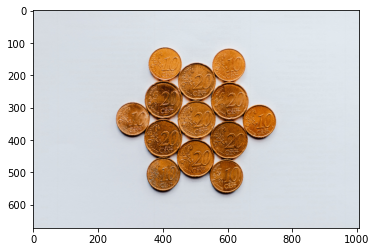

In [9]:
plt.imshow(img)

### Canny Edge Detection

In [10]:
from skimage import feature

In [11]:
high_threshold = 150
low_threshold = 130

##### Select a single channel

A single channel needs to be passed into the canny edge detector

In [12]:
img_oc = img[:, :, 1]

In [13]:
edges = feature.canny(img_oc, 0.5, low_threshold, high_threshold)

Text(0.5, 1.0, 'Canny Edge Detection')

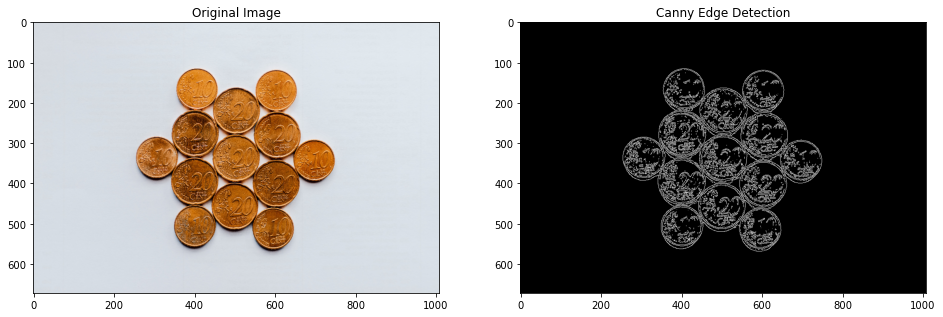

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img)
ax[0].set_title("Original Image")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Canny Edge Detection")

### Hough Circle Fitting

In [15]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
import numpy as np

import matplotlib.pyplot as plt

In [16]:
# define possible radii
hough_radii = np.arange(50, 90, 10)

In [17]:
hough_radii

array([50, 60, 70, 80])

Here we don't need to define theta range as it'll calculate using the gradient

In [18]:
hough_res = hough_circle(edges, hough_radii)

#### Plot the Hough Space

In [19]:
hough_res.shape

(4, 672, 1008)

We can see that the hough space has three dimensions: (r, a, b)

Text(0.5, 1.0, 'Hough space with radius 70')

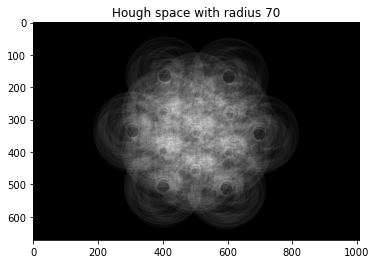

In [20]:
plt.imshow(hough_res[2, :, :], cmap="gray")
plt.title("Hough space with radius 70")

#### Plot detected circles

In [21]:
# Select the most prominent 2 circles
accums, a, b, radii = hough_circle_peaks(hough_res, hough_radii, threshold=0.3, min_ydistance=80, min_xdistance=80)

In [22]:
radii

array([50, 50, 50, 50, 50, 50, 60, 50, 60, 60, 50, 60, 60])

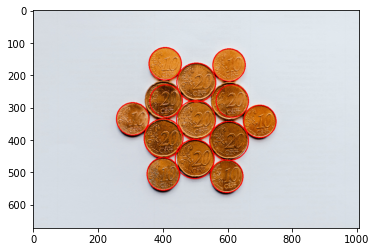

In [23]:
# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for center_y, center_x, radius in zip(a, b, radii): # remember a, b are the circle centers in image space
    cv2.circle(img, (center_y, center_x), radius, (255, 0, 0), thickness=2)

ax.imshow(img)
plt.show()

##### Great!

We're able to detect all the circles. We can adjust 'threshold' and 'min_distance' and radii parameters to get required results